# Importamos librerias 📚

In [15]:
# Bibliotecas generales
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# Modulos espcificos de Sklearn

from sklearn.decomposition import KernelPCA

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA



from sklearn.linear_model import LogisticRegression


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Creamos DataFrame ✅

In [16]:
dt_heart  =pd.read_csv("../data/heart.csv")
dt_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Creamos Variables de Train y Test

In [17]:
dt_features = dt_heart.drop(["target"], axis=1)
dt_target = dt_heart["target"]
#Normalizamos los datos (escalarlos)
dt_features = StandardScaler().fit_transform(dt_features)
# Realizamos la separación de datos entre entrenamiento y test 

X_train, X_test, y_train, y_test = train_test_split(dt_features,dt_target,test_size=.3, random_state=42)

# Funcion de Kernel

In [18]:
kpca = KernelPCA(n_components=4, kernel= "poly") # kernel = "poly" , "linear"
kpca.fit(X_train)

dt_train= kpca.transform(X_train)
dt_test = kpca.transform(X_test)
#Regresion logista para clasificacion una vez reducida su dimensionaldiad

logistic = LogisticRegression(solver="lbfgs")

logistic.fit(dt_train,y_train)

print("Score KPCA %.2f%% " % ((logistic.score(dt_test,y_test)*100)))

Score KPCA 79.87% 


# Pruebas entre mejor modelo

In [19]:
# El numero de componentes no es necesario, si no se pone el número seria
# n_components = min(n_muestras, n_features)
components = 3
pca = PCA(n_components=components)

pca.fit(X_train)

# Comparación con incremental PCA IPCA
# batch_size -> cantidad de bloques que manda a entrenamiento (consumindo así menos GPU)
ipca = IncrementalPCA(n_components=components, batch_size=10)
ipca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=3)

In [24]:
# Configuracion de la regresión logística
logistic = LogisticRegression(solver='lbfgs')

pca_data = {'accuracy': [], # Exactitud
            'n_components': []}
ipca_data = {'accuracy': [],
            'n_components': []}
kpca_data = {'accuracy': [],
            'n_components': []}
# PCA
for n in range(2, 10):
    pca = PCA(n_components=n)
    pca.fit(X_train)
    df_train = pca.transform(X_train)
    df_test = pca.transform(X_test)
    logistic.fit(df_train, y_train)
    acccuracy = logistic.score(df_test, y_test)
    
    pca_data['accuracy'].append(acccuracy)
    pca_data['n_components'].append(n)

# IPC
for n in range(2, 10):
    ipca = IncrementalPCA(n_components=n, batch_size=10)
    ipca.fit(X_train)
    df_train = ipca.transform(X_train)
    df_test = ipca.transform(X_test)
    logistic.fit(df_train, y_train)
    acccuracy = logistic.score(df_test, y_test)
    
    ipca_data['accuracy'].append(acccuracy)
    ipca_data['n_components'].append(n)


# KPCA
for n in range(2, 10):
    kpca = KernelPCA(n_components=n, kernel="poly")
    kpca.fit(X_train)
    df_train = kpca.transform(X_train)
    df_test = kpca.transform(X_test)
    logistic.fit(df_train, y_train)
    acccuracy = logistic.score(df_test, y_test)
    
    kpca_data['accuracy'].append(acccuracy)
    kpca_data['n_components'].append(n)



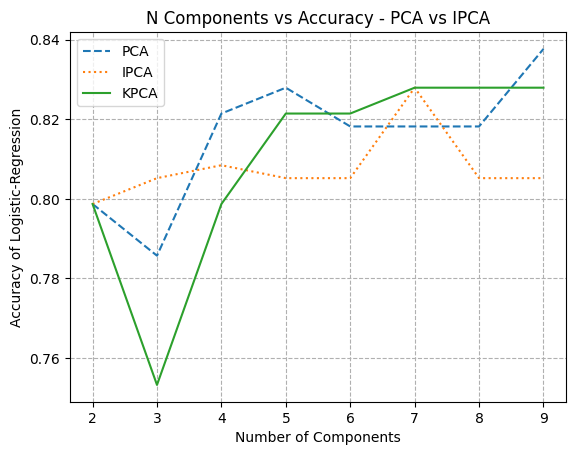

In [30]:
plt.plot(pca_data['n_components'], pca_data['accuracy'], label='PCA', linestyle='--')
plt.plot(ipca_data['n_components'], ipca_data['accuracy'], label='IPCA', linestyle=":")
plt.plot(kpca_data['n_components'], kpca_data['accuracy'], label='KPCA')
plt.title('N Components vs Accuracy - PCA vs IPCA')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy of Logistic-Regression')
plt.legend()
plt.grid(True,linestyle='--')  # Agrega una cuadrícula al gráfico
plt.show()